In [34]:
import csv
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.colors as colors

import cv2

In [35]:
lbl_dir='/mnt/openimgv4/valid/validation-annotations-bbox.csv'
cls_dir='/mnt/openimgv4/train/label/challenge-2018-class-descriptions-500.csv'
dat_dir='/mnt/openimgv4/valid/val_data/'

In [36]:
# search for labels for a given image id
id_idx=0 #index of image id
lbl_idx=[2, 4, 5, 6, 7] #label_name, xmin, xmax, ymin, ymax

def get_box(id):
    out=np.reshape(['0',0,0,0,0],(1,5))
    with open(lbl_dir,encoding='utf-8') as csvfile:
        csv_dat=csv.reader(csvfile)
        for i,rows in enumerate(csv_dat):
            if rows[id_idx]==id:
                tmp=['0']
                row=rows
                for k in lbl_idx:
                    tmp.append(str(row[k]))
                tmp=tmp[1:]
                out=np.append(out,np.reshape(tmp,(1,5)),axis=0)
        out=np.delete(out,0,axis=0)
        return out # every 5 values (1 row) corresponds to 1 bbox

In [37]:
# convert csv file to dict
def row_csv2dict(csv_file):
    dict_club={}
    with open(csv_file)as f:
        reader=csv.reader(f,delimiter=',')
        for row in reader:
            dict_club[row[0]]=row[1]
    return dict_club

In [38]:
cls_dict=row_csv2dict(cls_dir)
cls_dict

{'/m/011k07': 'Tortoise',
 '/m/0120dh': 'Sea turtle',
 '/m/01226z': 'Football',
 '/m/012n7d': 'Ambulance',
 '/m/012w5l': 'Ladder',
 '/m/0130jx': 'Sink',
 '/m/0138tl': 'Toy',
 '/m/013y1f': 'Organ',
 '/m/014j1m': 'Apple',
 '/m/014sv8': 'Human eye',
 '/m/014y4n': 'Paddle',
 '/m/0152hh': 'Snowman',
 '/m/01599': 'Beer',
 '/m/015h_t': 'Human beard',
 '/m/015p6': 'Bird',
 '/m/015qff': 'Traffic light',
 '/m/015wgc': 'Croissant',
 '/m/015x4r': 'Cucumber',
 '/m/015x5n': 'Radish',
 '/m/0162_1': 'Towel',
 '/m/0167gd': 'Doll',
 '/m/016m2d': 'Skull',
 '/m/0174k2': 'Washing machine',
 '/m/0174n1': 'Glove',
 '/m/0175cv': 'Tick',
 '/m/0176mf': 'Belt',
 '/m/017ftj': 'Sunglasses',
 '/m/018p4k': 'Cart',
 '/m/018xm': 'Ball',
 '/m/01940j': 'Backpack',
 '/m/0199g': 'Bicycle',
 '/m/019dx1': 'Home appliance',
 '/m/019h78': 'Centipede',
 '/m/019jd': 'Boat',
 '/m/019w40': 'Surfboard',
 '/m/01_5g': 'Chopsticks',
 '/m/01b638': 'Boot',
 '/m/01b7fy': 'Headphones',
 '/m/01b9xk': 'Hot dog',
 '/m/01bfm9': 'Shorts',
 '/

In [39]:
# search for class name for a given label
def get_cls(lbl):
    if lbl in cls_dict:
        return cls_dict[lbl]
    else:
        return 'None' # return 'None' for empty labels

In [40]:
# convert code to actual class name
def code2name(labels):
    for i in range(np.size(labels,0)):
        labels[i,0]=get_cls(labels[i,0])
    return labels

In [41]:
# convert bbox coordinates to plt
def box_to_rect(box_x, box_y, color, linewidth):
    return plt.Rectangle(
        (box_x[0], box_y[0]), box_x[1]-box_x[0], box_y[1]-box_y[0],
        fill=False, edgecolor=color, linewidth=linewidth)

In [42]:
# show the bboxs and labels in a image
def show_box(id):
    lbls=code2name(get_box(id))
    img=cv2.imread(dat_dir+id+'.jpg')
    plt.imshow(img)
    w=np.size(img,1)
    h=np.size(img,0)
    pycolors=list(colors.cnames.keys())
    for i in range(np.size(lbls,0)):
        box_x=[float(lbls[i,1])*w,float(lbls[i,2])*w]
        box_y=[float(lbls[i,3])*h,float(lbls[i,4])*h]
        cls_text = lbls[i,0]
        if cls_text != 'None':
            color=pycolors[int((ord(cls_text[-1])+ord(cls_text[-2]))*0.5)]
            rect = box_to_rect(box_x,box_y,color,1)
            plt.gca().add_patch(rect)
            plt.gca().text(box_x[0], box_y[0],cls_text,
                      color=color,
                      fontsize=10
                      )
    plt.show()

In [45]:
lbls=code2name(get_box('bd83bbbb96d9d4a4'))
lbls

array([['Person', '0.000000', '0.979923', '0.080869', '0.999382'],
       ['Building', '0.000000', '0.999971', '0.000000', '1.000000']],
      dtype='<U9')

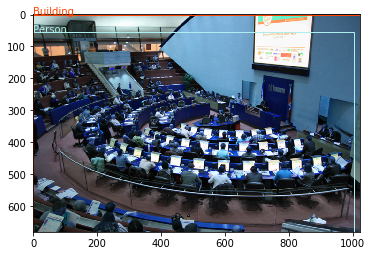

In [47]:
show_box('bd83bbbb96d9d4a4')

In [14]:
lbls=code2name(get_box('7f23a7e7d59a3beb'))
lbls

array([['Human eye', '0.367904', '0.381403', '0.211168', '0.221453'],
       ['Human eye', '0.389817', '0.396773', '0.207042', '0.213664'],
       ['Human eye', '0.746183', '0.752399', '0.208662', '0.217236'],
       ['Person', '0.103003', '0.346642', '0.155353', '0.569605'],
       ['Person', '0.216614', '0.261270', '0.200894', '0.291977'],
       ['Person', '0.258643', '0.270464', '0.255194', '0.287598'],
       ['Person', '0.554163', '0.618521', '0.397073', '0.483777'],
       ['Person', '0.630998', '0.828011', '0.037120', '0.513554'],
       ['Person', '0.717684', '0.819474', '0.221038', '0.513554'],
       ['Person', '0.848370', '0.879235', '0.382184', '0.483777'],
       ['Person', '0.900250', '0.926518', '0.380433', '0.482901'],
       ['Person', '0.954100', '1.000000', '0.167614', '0.760529'],
       ['Human mout', '0.379630', '0.397566', '0.231031', '0.240543'],
       ['Human mout', '0.737976', '0.747624', '0.231073', '0.243082'],
       ['Woman', '0.334670', '0.451496', '0.1

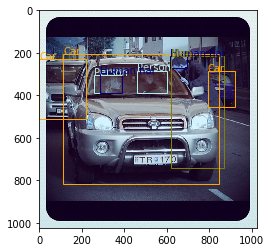

In [33]:
show_box('afa043bff608b4d8')